In [18]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss
from pandas.api.types import CategoricalDtype
KNeighboursClassifier = KNeighborsClassifier
from sklearn.cluster import KMeans
%matplotlib inline

# PART A: 20-NEWSGROUPS [60 POINTS]

Load the training and testing datasets into two pandas dataframes. 
Note that each contains both the features as well as the target, as the last column labelled `class'. 
You should extract the features and targets into separate dataframes/arrays.

# [1.1] (5 points) 

Focusing first on the training set, summarise the key features/observations in the data: 
focus on the dimensionality, 

data ranges, 

feature and class distribution and 

report anything out of the ordinary. 

What are the typical values of the features like?


# ANSWER

Number of instances of training data: 5648, number of attributes: 1000
The mean values of the attributes range from 0.000100 to 0.025200

In [19]:
#Loading Data Set
data_path_20ng_train = os.path.join(os.getcwd(), 'Data', 'PartA', '20ng_train.csv')
data_path_20ng_test = os.path.join(os.getcwd(), 'Data', 'PartA', '20ng_test.csv')

ngtrain = pd.read_csv(data_path_20ng_train,compression='bz2',delimiter = ',')
ngtest = pd.read_csv(data_path_20ng_test, compression='bz2', delimiter = ',')

#Splitting Data
X = ngtrain.drop('class', axis=1)
y = ngtrain['class'].values

print('Number of instances of training data: {}, number of attributes: {}'.format(ngtrain.shape[0], ngtrain.shape[1]-1))
print('Number of instances of testing data: {}, number of attributes: {}'.format(ngtest.shape[0], ngtest.shape[1]-1))



Number of instances of training data: 5648, number of attributes: 1000
Number of instances of testing data: 1883, number of attributes: 1000


In [24]:
lol=pd.DataFrame()
lol['# of Samples'] = ngtrain.groupby('class').size()
print(lol.T.to_latex())
#display(pd.DataFrame(ngtrain.groupby('class').size())

\begin{tabular}{lrrrrrrrr}
\toprule
class &    0 &    1 &    2 &    3 &    4 &    5 &    6 &    7 \\
\midrule
\# of Samples &  737 &  722 &  742 &  747 &  743 &  738 &  748 &  471 \\
\bottomrule
\end{tabular}



In [42]:
#ngtrain.head(50)
X
np.sum((X == 0).astype(int).sum(axis=1))
print(5507722/5648000*100)

97.51632436260623


In [23]:
ngtrain.mean().sort_values()
#ngtrain.describe()

elohim     0.000100
jehovah    0.000200
mov        0.000211
ripem      0.000565
ra         0.000581
             ...   
don        0.022885
just       0.024518
know       0.024756
like       0.025200
class      3.345255
Length: 1001, dtype: float64

In [6]:
#ngtrain.describe().sort(axis=0)
#ngtrain.sort_values('class')

# [1.2] (3 points) 

Looking now at the Testing set, how does it compare with the Training Set (in terms of sizes and feature-distributions) and what could be the repurcussions of this?

In [14]:
lolz=pd.DataFrame()
lolz['# of Samples'] = ngtest.groupby('class').size()
print(lolz.T.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
class &    0 &    1 &    2 &    3 &    4 &    5 &    6 &    7 \\
\midrule
\# of Samples &  245 &  241 &  248 &  249 &  248 &  246 &  249 &  157 \\
\bottomrule
\end{tabular}



# Answer

Number of instances of testing data: 1883, number of attributes same as training data
Testing: The mean values of the attributes range from 0.000165 to 0.025611
Training: The mean values of the attributes range from 0.000100 to 0.025200


In [7]:
#ngtest.sort_values()
#ngtest.mean().sort_values()
#ngtrain.describe()

# [1.3] (2 points) 

Why do you think it is useful to consider TF-IDF weights as opposed to just the frequency of times a word appears in a document as a feature?


Term-Frequency/Inverse-Document
Frequency TF-IDF weights for each word instead of the frequency counts. These weights represent the importance of a word to a document, with respect to a collection of documents. The importance increases proportionally to the number of times a word appears in the document, and is inversely proportional to the number of times the word appears in the whole corpus.

# Answer

 if only frequencies were used: words like 'just, 'know' & 'like' have high frequncy in the whole corpus and would dominate in classifications. 
 
 Using TF-IDF : the importance of these words is decreased as it is inversly proprtional to the frequency in the corpus.
 

# Question 2 : (24 points) Unsupervised Learning

We will now explore the documents in some detail by way of clustering.
We will be focusing mainly on K-Means clustering. In what follows we will use ONLY
the training data.

# [2.1] (2 points) 

The K-Means algorithm is non-deterministic. Explain why this is, and
how the final model is selected in the SKLearn implementation of KMeans.

# Answer

The K-Means algorith is non-determinsitic as it can produce different results each time it is run. This is due to the fact that it randomly selects data points as initial clusters.

With the parameter init='k-means++' , the SKLearn implementation initializes the centroids to be generally distant from each other. Some models may get stuck at a local minima during convergence. Therefore, different initial clusters are used. The model that has a global minima is selected.


# [2.2] (1 point) 

One of the parameters we need to specify when using k-means is the number
of clusters. What is a reasonable number for this problem and why?

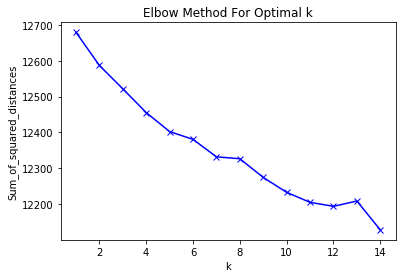

In [8]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X)
data_transformed =mms.transform(X)


Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Answer

8 Clusters are reasonable as we have to classify our data into 8 classes.



# [2.3] (5 points) 

We will use the Adjusted Mutual Information (AMI) i.e. adjusted_mutual_info_score between the clusters and the true (known) labels to quantify the performance of the clustering. 

Give an expression for the MI in terms of entropy. 
In short, 
describe what the MI measures about two variables, 
why this is applicable here and 
why it might be difficult to use in practice. 

Hint: MI is sometimes referred to as Information Gain: note that you are asked only about the standard way we defined MI and not the AMI which is adjusted for the size of the domain and for chance agreement.

# Answer

Expression for Mutual Information I(X,Y) between two variables X & Y in terms of Entropy H

    I(X, Y) = H(X) - H(X|Y) where H(X|Y) is the conditional entropy of X given Y


The MI is applicable here as it can me used as a measure of simmilarity between the two sets of data.
If the Predicted Class Labels (P) are identical to the True Class Labels (T) then 
I(P,T) = H(P) - 0 = H(P) 

The MI is practically difficult to use as it is hugher if the number of clusters is larger regardless of the simmilarity between them. Also it is computationally slower than other more robust metrics.






# [2.4] (4 points) 

Fit K-Means objects with n_clusters ranging from 2 to 12. 
Set the random seed to 1000 and the number of initialisations to 50, but leave all other values at default. 

For each t compute the adjusted mutual information (there is an SKLearn function for that). 
Set average_method=`max' . 

Plot the AMI scores against the number of clusters (as a line plot).

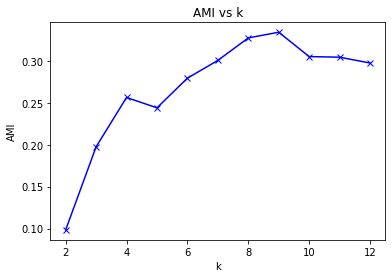

In [20]:
from sklearn.metrics.cluster import adjusted_mutual_info_score
label_true=y
AMI = []
K = range(2,13)
for k in K:
    km = KMeans(n_clusters=k, random_state=1000, n_init=50)
    km.fit(X)
    label_pred=km.labels_
    AMI.append(adjusted_mutual_info_score(label_true, label_pred,average_method='max'))
    
plt.plot(K, AMI, 'bx-')
plt.xlabel('k')
plt.ylabel('AMI')
plt.title('AMI vs k')
plt.savefig('2_4.png')
plt.show()  


# Answer

# [2.5] (3 points) 

Discuss any trends 
and interesting aspects which emerge from the plot.

Does this follow from your expectations?

# Answer

The Adjusted Mutual Information (AMI) increases as the number of clusters increase from 2 to 8 clusters. 4 Clusters seems to be interesting as the AMI is higher than that for 5 Clusters. The AMI is highest at 9 clusters. The AMI decrases for number of clusters = 10 , 11, 12


Ideally we would expect 8 Clusters to have the highest AMI. However, this is very close  as the highest AMI is at 9 clusters with little difference with the AMI at 8 clusters. A high AMI means that the predicted classes were closer to the true values. The drop in AMI after 9 clusters is also as expected as the true values of class labels only range from 0 to 7.

# [2.6] (6 points) 

Let us investigate the case with four (4) clusters in some more detail.

Using seaborn's countplot function, 
plot a bar-chart of
number of data-points with a particular class (encoded by colour) assigned 
to each cluster centre (encoded by position on the plot's x-axis). 

As part of the cluster labels, include the total number of data-points assigned to that cluster.

5181.133561878838
0.2564638316247754
Counter({3: 3370, 0: 1258, 2: 606, 1: 414})


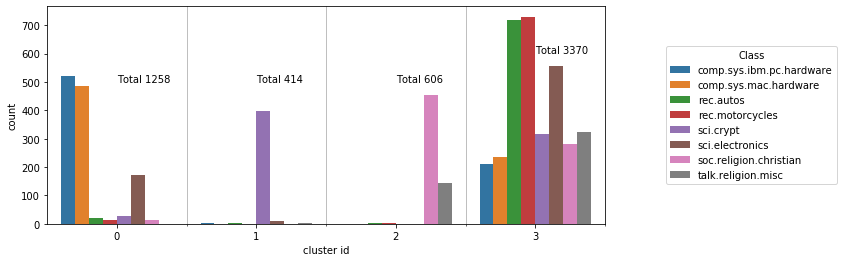

In [22]:
from collections import Counter, defaultdict
from sklearn.metrics.cluster import adjusted_mutual_info_score

km = KMeans(n_clusters=4, random_state=1000, n_init=50)
km.fit(X)
print (km.inertia_)
print (adjusted_mutual_info_score(km.labels_, y,average_method='max'))

print(Counter(km.labels_))
fig, ax = plt.subplots(figsize=(10,4))
ax = sns.countplot(x=km.labels_, hue=y, ax=ax)
ax.legend(labels=['comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','rec.autos','rec.motorcycles', 'sci.crypt', 
                  'sci.electronics', 'soc.religion.christian','talk.religion.misc'],
          loc='center left', bbox_to_anchor=[1.1, 0.5], title='Class')
plt.gca().set_xticks([i + 0.5 for i in range(4)], minor=True)
plt.grid(True, which='minor')
plt.xlabel('cluster id')
plt.text(x = 0, y = 500, s = "Total 1258")
plt.text(x = 1, y = 500, s = "Total 414")
plt.text(x = 2, y = 500, s = "Total 606")
plt.text(x = 3, y = 600, s = "Total 3370")
plt.savefig('2_6.png')
plt.show()

# Answer

# [2.7] (3 points) 

How does the clustering in Question2.6 align with the true class labels?
Does it conform to your observations in Q 2.5 ?

# Answer


The clustering sepeates Group 4 as it is the only one with a dominant peak.
However, the other data points are not well seperated.
The true class labels do not align with the predicted labels. This conforms to obervations of AMI in Q2.5 as the AMI is low (AMI for n_clusters=4 is 0.24) .i.e low simmilarity between true and predicted labels.

# Question 3 : (26 points) Logistic Regression Classification
We will now try out supervised classication on this data. We will focus
on Logistic Regression and measure performance in terms of the F1 score
(familiarise yourself with this score which is related to the precision and recall
scores that we learnt about in class).

In most cases, we will need to validate hyper-parameters: to this end, we will use K-
Fold cross validation. Using the provided SKLearn implementation for StratiedKFold,
create a 10-Fold stratied split of the data. Make sure to set the random state to 0
for reproducibility, and turn on shuing. We will use the same splits provided by this
throughout this question.

In [8]:
#Imports
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold

#Loading test Data

Xt = ngtest.drop('class', axis=1)
yt = ngtest['class'].values


In [9]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = ngtrain.loc[train_index],ngtrain.loc[test_index]
    #ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    
    #model
#     lr = LogisticRegression(C=2)
#     lr.fit(xtr,ytr)
#     score = roc_auc_score(yvl,lr.predict(xvl))
#     print('ROC AUC score:',score)
#     cv_score.append(score)    
#     pred_test = lr.predict_proba(x_test)[:,1]
#     pred_test_full +=pred_test
    i+=1


1 of KFold 10
2 of KFold 10
3 of KFold 10
4 of KFold 10
5 of KFold 10
6 of KFold 10
7 of KFold 10
8 of KFold 10
9 of KFold 10
10 of KFold 10


# [3.1] (3 points) 
What is the F1-score, and why is it preferable to accuracy in our problem?
How does the macro-average work to extend the score to multi-class classification?

# Answer
The F1 Score is  2*((precision*recall)/(precision+recall)). 

Precision:   True Positives / (True Positives + False Positives)

Recall:      True Positives / (True Positives + False Negatives)

F1 is the weighted average of Precision and Recall.

It is more preferable to accuracy as False Negatives and False positives are important in our problem.
Accuracy can be largely contributed to by a high number of True Positives and True Negatives which is not useful in our problem.

macro avarage calculates the F1 separated by class:

    Fgroup1+Fgroup2+⋅⋅⋅+Fgroup8


In multi-class classification this means that classes with fewer number of data points will be favoured. If the classifier performs badly in these minority classes the macro average heavily penalized.




# [3.2] (2 points) 

As always we start with a simple baseline classifier. Define such a classifier (indicating why you chose it) 
and report its performance on the Test set. 
Use the `macro' average for the f1_score .

In [10]:
ngtrain.groupby('class').size()

from sklearn.dummy import DummyClassifier
from sklearn import metrics

dc = DummyClassifier(strategy='stratified', random_state=0, constant=None)
dc.fit(X,y)

y_pred = dc.predict(Xt)

print(metrics.classification_report(yt, y_pred, digits=4))


              precision    recall  f1-score   support

           0     0.1416    0.1306    0.1359       245
           1     0.1494    0.1494    0.1494       241
           2     0.1330    0.1169    0.1245       248
           3     0.1594    0.1767    0.1676       249
           4     0.1222    0.1331    0.1274       248
           5     0.1208    0.1179    0.1193       246
           6     0.1336    0.1406    0.1370       249
           7     0.0667    0.0637    0.0651       157

    accuracy                         0.1317      1883
   macro avg     0.1283    0.1286    0.1283      1883
weighted avg     0.1312    0.1317    0.1313      1883



# Answer

The sklearn DummyClassifier with stratified strategy gives a f1-score macro avg of 0.1283.

The stratified Dummy Classifier predicts that there is a 90% probability that each object it encounters possesses the target property. The most frequent strategy would not be as useful as most of the classes have a simmilar count.


# [3.3] (3 points) 
We will now train a LogisticRegression Classifier from SKLearn. By
referring to the documentation, explain how the Logistic Regression model can be applied
to classify multi-class labels as in our case. Hint: Limit your explanation to methods we
discussed in the lectures.

# Answer


The SKLearn Logistic Regression Classifier in the multi_class mode uses the one vs rest scheme 

i.e Creates different weight vectores wk for each class to classify into k and not-k 

It then uses the softmax function.


# [3.4] (4 points) 
Train a Logistic Regressor on the training data. Set solver=`lbfgs' ,
multi_class=`multinomial' and random_state=0 . Use the Cross-Validation object you
created and report the average validation-set F1-score as well as the standard deviation.
Comment on the result.

In [11]:
from sklearn.metrics import f1_score
from sklearn import model_selection

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

f1=[]

Xlr=X.to_numpy()

lr = LogisticRegression(solver = 'lbfgs', multi_class='multinomial', random_state=0)
results = model_selection.cross_val_score(lr, X, y, cv=kf)
print(results.std())

i=1
for train_index,test_index in kf.split(Xlr,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    
    xtr, xvl = Xlr[train_index], Xlr[test_index]
    ytr, yvl = y[train_index], y[test_index]
    
    lr = LogisticRegression(solver = 'lbfgs', multi_class='multinomial', random_state=0)
    lr.fit(xtr, ytr)
    
    y_pred=lr.predict(xvl)
    y_true=yvl
    f1.append(f1_score(y_true, y_pred, average='macro'))
    
    i=i+1
    
    
print (np.mean(f1))

0.01350166158539
1 of KFold 10
2 of KFold 10
3 of KFold 10
4 of KFold 10
5 of KFold 10
6 of KFold 10
7 of KFold 10
8 of KFold 10
9 of KFold 10
10 of KFold 10
0.6689909262264606


# Answer



The average f1 score is 0.67
The standard deviation is 0.0135

The f1 score is approximately 5 times larger than the f1 score for the base classifier
The standard deviation is small which suggests a tight spread of data around the mean.

# [3.5] (5 points) 
We will now optimise the Regularisation parameter C using cross-validation.

Train a logistic regressor for different values of C : in each case, evaluate the F1 score on the training and validation portion of the fold. That is, for each value of C you must provide the training set and validation-set scores per fold 

and then compute (and store) the average of both over all folds. 

Finally plot the (average) training and validation-set scores as a function of C . 

    Hint: Use a logarithmic scale for C , spanning 19 samples between 10^−4 to 10^5 .

In [12]:
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

def frange(start, stop):
    step=(stop-start)/19
    i = start
    while i < stop:
        yield i
        i += step
        
def power(my_list):
    return [ 10**x for x in my_list ]

Xlr=X.to_numpy()

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

C_param_range = power(list(frange(-4, 5)))

#print(C_param_range)


f1_tr=[]
f1_vl=[]

f1_tr_avg=[]
f1_vl_avg=[]


for j in C_param_range:
    f1_tr_a=[]
    f1_vl_a=[]
    f1=[]
    i=1
    #print ('C = {:10.4f}'.format(j))
    for train_index,test_index in kf.split(Xlr,y):
        xtr, xvl = Xlr[train_index], Xlr[test_index]
        ytr, yvl = y[train_index], y[test_index]
    
        lr = LogisticRegression(C=j, solver = 'lbfgs', multi_class='multinomial', random_state=0)
        lr.fit(xtr, ytr)
    
        y_pred=lr.predict(xvl)
        y_true=yvl
        f1_vl_=f1_score(y_true, y_pred, average='macro')
        f1_vl.append(f1_vl_)
        f1_vl_a.append(f1_vl_)
        
        
        y_pred=lr.predict(xtr)
        y_true=ytr
        f1_tr_=f1_score(y_true, y_pred, average='macro')
        f1_tr.append(f1_tr_)
        f1_tr_a.append(f1_tr_)
        
        #print('KFold {} with F1-Score Validation = {:10.4f} & Training = {:10.4f}'.format(i,f1_vl_,f1_tr_))
        i=i+1
    f1_tr_avg.append(np.mean(f1_tr_a))
    f1_vl_avg.append(np.mean(f1_vl_a))

#print (np.mean(f1_tr))
#print (np.mean(f1_vl))


    

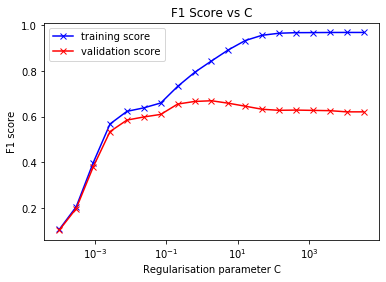

In [13]:
plt.plot(C_param_range, f1_tr_avg,'bx-', label='training score')
plt.plot(C_param_range, f1_vl_avg, 'bx-', label='validation score',color='red')
plt.xscale('log')
plt.legend()
plt.xlabel('Regularisation parameter C')
plt.ylabel('F1 score')
plt.title('F1 Score vs C')
plt.savefig('3_5.png')
plt.show()

In [17]:
print (C_param_range)
print (f1_vl_avg)

[0.0001, 0.00029763514416313193, 0.0008858667904100832, 0.002636650898730361, 0.007847599703514624, 0.023357214690901247, 0.06951927961775613, 0.2069138081114791, 0.6158482110660268, 1.832980710832437, 5.455594781168523, 16.237767391887225, 48.32930238571755, 143.8449888287663, 428.13323987193957, 1274.2749857031347, 3792.6901907322535, 11288.378916846907, 33598.18286283788]
[0.10426652383342358, 0.19865011762377235, 0.3795273836320723, 0.53502699499779, 0.585080338713321, 0.598791384425776, 0.6099087524982338, 0.6550816308194474, 0.6665026833366225, 0.669581417512589, 0.6587800910022514, 0.6457415426624259, 0.6323887177247729, 0.627836908010788, 0.6288140945747085, 0.6275061304807361, 0.6262510263176051, 0.6210611462927627, 0.6210797365033175]


# Answer




# [3.6] (7 points) 
What is the optimal value of C (and the corresponding score)? 

How did you choose this value? 

By making reference to the effect of the regularisation parameter C on the optimisation, explain what is happening in your plot from Question 3:(e) 

    Hint: Refer to the documentation for C in the LogisticRegression page on SKLearn .

# Answer

Optimal C = 1.832981 with f1-score = 0.6696. 

This value was chosen as it is the elbow of the line plot on the training score. It is the point where the overfitting just starts to become more noticeable. This value of C also gives the highest f1-score on the validation set.
Therefore, it is the point that provides a good balance.

In the plot, as the Regularization Parameter C increases, the regularization strength decreases. This means that the model is more likely to over-fit. This can be seen in the graph as the difference in f1 score between the validation set and the training set also increases. The f1- score on the training set is much larger than the f1- score on the validation set for large values of C.



smaller C Larger Lambda ... Larger Lambda less overfitting ...

# [3.7] (2 points) 
Finally, report the score of the best model on the test-set, after retraining
on the entire training set (that is drop the folds). Hint: You may need to set max_iter
= 200 . Comment briefly on the result.

In [18]:
lr = LogisticRegression(C=1.832980710832437, solver = 'lbfgs', multi_class='multinomial', random_state=0, max_iter=200)
lr.fit(X, y)
y_pred = lr.predict(Xt)
print (f1_score(yt, y_pred, average='macro'))

0.6711918701589776


# Answer

f1 score: 0.6711918701589776

The f1 score is very close to the f1-score using cross validation

